# Social Media Sentiment Analysis Demo

This notebook demonstrates the usage of our Social Media Sentiment Analysis System.


In [1]:
import sys
import os

# Add the project root directory to Python path using absolute path
project_root = "../"
sys.path.append(project_root)

# Import the required modules
from src.main import SentimentAnalysisSystem
import pandas as pd
import numpy as np

## 1. Load Sample Data

First, let's load our social media data.


In [2]:
# Read The dataset
sample_data = pd.read_csv("../data/social_media_data.csv")

# Show The First 5 Rows as sample data
sample_data.head()

,text,date
0,"The Sony laptop's software Not bad, not great 💫",2024-05-12 00:18:31.968292
1,"The Microsoft laptop's camera Not bad, not gre...",2024-05-12 00:18:31.968292
2,The HP console's price Terrible product 😫,2024-05-13 00:18:31.968292
3,The Lenovo tablet's quality Regular performance 😐,2024-05-13 00:18:31.968292
4,The Amazon TV's battery life Love this product! 💯,2024-05-13 00:18:31.968292


## 2. Initialize and Process Data


In [3]:
# Initialize the system
sentiment_system = SentimentAnalysisSystem()

# Run analysis
analyzed_data = sentiment_system.analyze_sentiments(sample_data)
analyzed_data.head()

,text,date,processed_text,tokens,sentiment_scores,vader_compound,vader_pos,vader_neu,vader_neg,textblob_polarity,textblob_subjectivity,predicted_sentiment,sentiment_probability
0,"The Sony laptop's software Not bad, not great 💫",2024-05-12 00:18:31.968292,sony laptop software bad great,"[sony, laptop, software, bad, great]","{'vader_compound': 0.6754, 'vader_pos': 0.48, ...",0.6754,0.480,0.520,0.000,-0.025,0.708333,0,0.403701
1,"The Microsoft laptop's camera Not bad, not gre...",2024-05-12 00:18:31.968292,microsoft laptop camera bad great,"[microsoft, laptop, camera, bad, great]","{'vader_compound': 0.6754, 'vader_pos': 0.48, ...",0.6754,0.480,0.520,0.000,-0.025,0.708333,0,0.403701
2,The HP console's price Terrible product 😫,2024-05-13 00:18:31.968292,hp console price terrible product,"[hp, console, price, terrible, product]","{'vader_compound': -0.4767, 'vader_pos': 0.0, ...",-0.4767,0.000,0.617,0.383,-1.000,1.000000,-1,0.400982
3,The Lenovo tablet's quality Regular performance 😐,2024-05-13 00:18:31.968292,lenovo tablet quality regular performance,"[lenovo, tablet, quality, regular, performance]","{'vader_compound': 0.0, 'vader_pos': 0.0, 'vad...",0.0000,0.000,1.000,0.000,0.000,0.076923,-1,0.367477
4,The Amazon TV's battery life Love this product! 💯,2024-05-13 00:18:31.968292,amazon tv battery life love product,"[amazon, tv, battery, life, love, product]","{'vader_compound': 0.7096, 'vader_pos': 0.496,...",0.7096,0.496,0.504,0.000,0.500,0.600000,1,0.380519


## 3. Generate and Display Visualizations


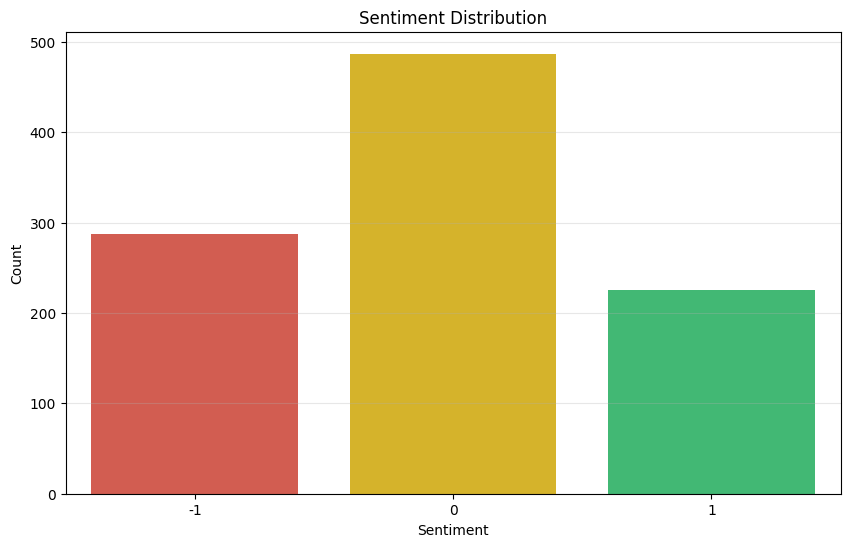

In [4]:
# Create visualizer
visualizer = sentiment_system.visualizer

# 1. Sentiment Distribution
sentiment_dist = visualizer.plot_sentiment_distribution(
    analyzed_data["predicted_sentiment"]
)

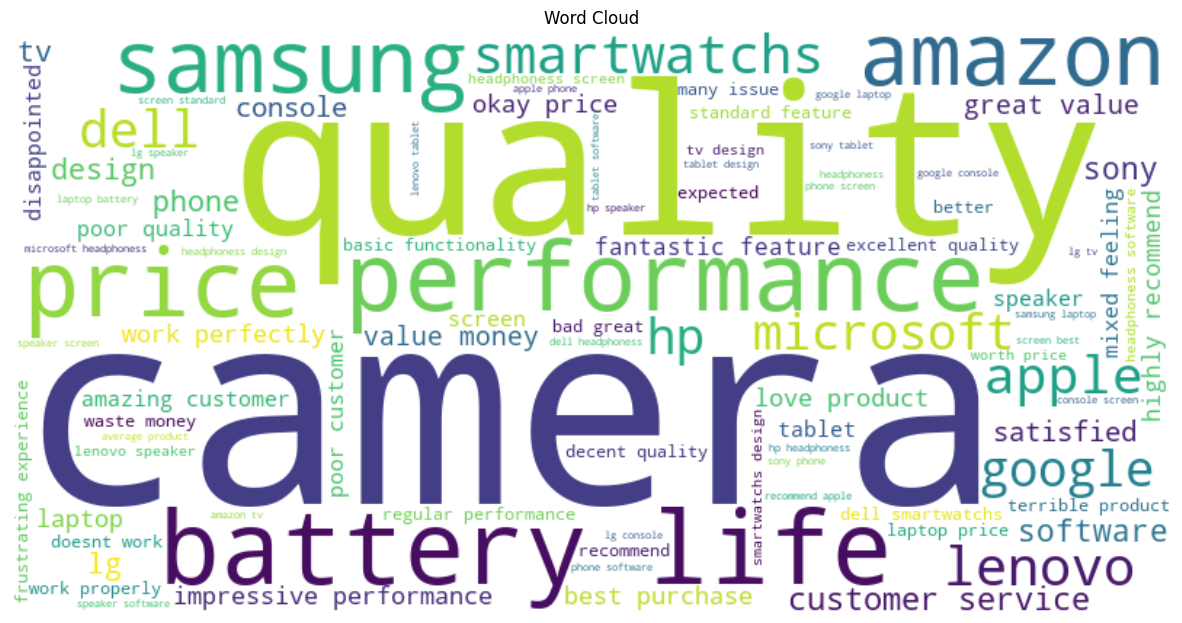

In [5]:
# 2. Word Cloud
wordcloud = visualizer.create_wordcloud(analyzed_data["processed_text"])

In [6]:
# 3. Sentiment Over Time (if date column exists)
if "date" in analyzed_data.columns:
    sentiment_trends = visualizer.plot_sentiment_over_time(
        analyzed_data["date"], analyzed_data["predicted_sentiment"]
    )
    sentiment_trends

In [7]:
# 4. Interactive Dashboard
dashboard = visualizer.create_interactive_dashboard(analyzed_data)
dashboard